<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Clustering_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
#import seaborn as sns; sns.set()

%matplotlib inline - Ensures that plots are displayed within the notebook.

numpy - Used for array operations.

matplotlib.pyplot - Used for data visualization.

scipy.stats - Provides statistical functions (not used directly here, but often needed in clustering).

sklearn.datasets.make_blobs - Generates synthetic clustering d

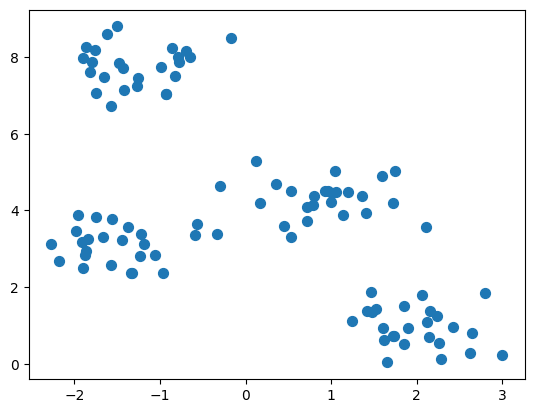

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, center_box = (-10,10),
                  random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], s=50);

### **🟢 Beginner Explanation - Creating Synthetic Data with `make_blobs`**

This code creates **synthetic** (fake) data that is **clustered** into groups, which is useful for practicing **clustering algorithms** like **K-Means** or **Spectral Clustering**.

---

#### **🔶 Code Breakdown:**

```python
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate 100 data points, grouped into 4 clusters
X, y = make_blobs(
    n_samples=100,        # Total number of data points
    centers=4,            # Number of clusters
    center_box=(-10, 10), # Range of the cluster centers
    random_state=0,       # Seed for reproducibility
    cluster_std=0.50      # How spread out each cluster is
)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()
```

---

#### **🔷 What This Code Does:**

1. **Generate Fake Data (`make_blobs`):**

   * **`n_samples=100`** → Creates **100** data points.
   * **`centers=4`** → Divides the points into **4** separate clusters.
   * **`center_box=(-10, 10)`** → Each cluster center is randomly placed within this range.
   * **`random_state=0`** → Ensures the data is the **same** every time you run the code (reproducibility).
   * **`cluster_std=0.50`** → Controls how **spread out** each cluster is (smaller values = tighter clusters).

2. **Visualize the Data (`plt.scatter`):**

   * **`X[:, 0]`** → The **x** coordinates of the data points.
   * **`X[:, 1]`** → The **y** coordinates of the data points.
   * **`s=50`** → Sets the **size** of the data points.

---

#### **🔷 Expected Result:**

* You should see **4** separate **clusters** of points scattered on a **2D plane**, each representing a group of **similar** points.

---

Would you like me to show you how to actually **cluster** this data next? Like using **K-Means** or **Spectral Clustering**? 😊


[3 1 3 3 3 3 0 1 3 1 1 1 1 1 1 2 2 0 0 2 3 1 0 2 3 0 0 3 2 2 2 1 2 2 0 3 1
 2 1 0 3 0 1 0 0 1 2 0 3 3 3 2 0 0 0 1 1 2 2 1 1 2 2 3 2 1 0 0 2 3 1 2 3 1
 3 3 0 0 2 2 2 1 0 3 2 0 2 2 3 3 3 0 3 0 0 1 1 0 1 3]
<function get_cmap at 0x7c58d36f1c60>


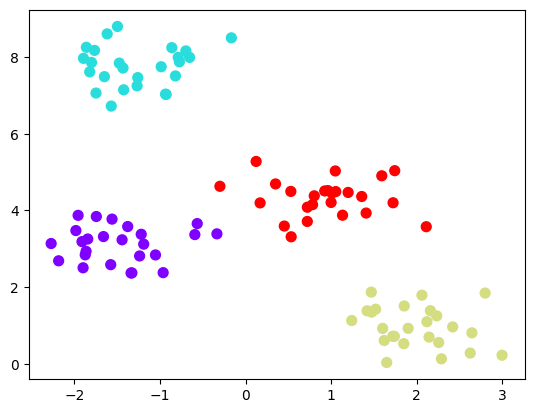

In [3]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
print(y_kmeans)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');
print(plt.get_cmap)


### **🟢 Beginner Explanation - Clustering with K-Means**

---

#### **🔶 Code Breakdown:**

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a K-Means model with 4 clusters
est = KMeans(4)  # 4 clusters

# Train the model to find the 4 clusters in the data
est.fit(X)

# Predict which cluster each point belongs to
y_kmeans = est.predict(X)
print(y_kmeans)

# Plot the points, color-coded by cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')

# Print the available color maps
print(plt.get_cmap)
plt.show()
```

---

#### **🔷 What This Code Does:**

1. **Create a K-Means Model (`KMeans`):**

   * **`KMeans(4)`** → Creates a model that will **find** **4** clusters in the data.

2. **Train the Model (`fit`):**

   * **`est.fit(X)`** → **Learns** the clusters by finding the **centers** of each group in the data.

3. **Predict the Cluster Labels (`predict`):**

   * **`est.predict(X)`** → Tells you which cluster each data point **belongs** to.
   * **Prints** the cluster labels for all data points (e.g., `[0, 1, 3, 2, 0, 1, ...]`).

4. **Visualize the Clusters (`plt.scatter`):**

   * **`plt.scatter`** → Draws the data points, colored by their **predicted** cluster.
   * **`c=y_kmeans`** → Colors each point by its **cluster label**.
   * **`cmap='rainbow'`** → Uses the **"rainbow"** color map to color the clusters differently.

5. **Print Available Color Maps (`plt.get_cmap`):**

   * **`print(plt.get_cmap)`** → Prints the **function** for getting color maps, which can be used to change the cluster colors.

---

#### **🔷 Expected Result:**

* You should see a **colorful** scatter plot where each group of similar points is colored **differently**, representing the **4** clusters found by the **K-Means** algorithm.

---

Would you like me to show you how to **improve** this clustering, like choosing the **best number** of clusters using the **elbow method** or **silhouette score**? 😊


# K-means step by step

## Initialize centroids

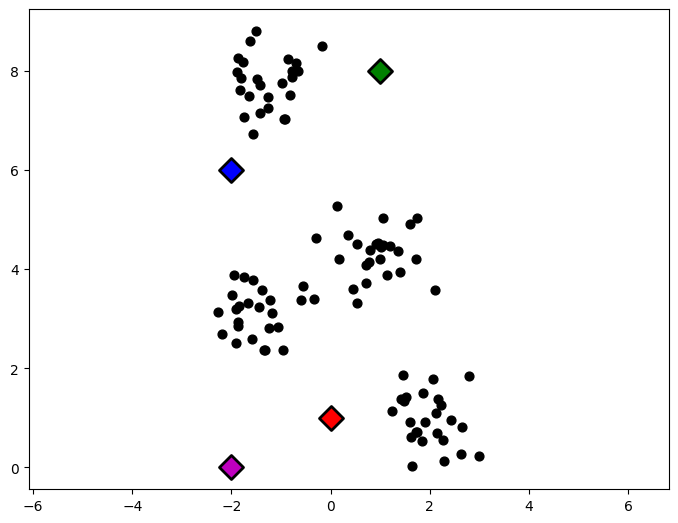

In [4]:
c0 = np.array([0.0,1.0])
c1 = np.array([-2.0,6.0])
c2 = np.array([1.0,8.0])
c3 = np.array([-2.0,0.0])

fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')
#ax_kmeans.scatter(X[:, 0], X[:, 1], s=4)
plt.scatter(X[:, 0], X[:, 1], c='k',s=40);
plt.scatter(c0[0],c0[1], c='r',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c1[0],c1[1], c='b',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c2[0],c2[1], c='g',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c3[0],c3[1], c='m',s=150,marker="D",edgecolor='k',linewidths=2)


### **🟢 Beginner Explanation - Plotting Cluster Centers in K-Means**

---


---

#### **🔷 What This Code Does:**

1. **Sets the Initial Cluster Centers:**

   * **`c0`, `c1`, `c2`, `c3`** → These are the **starting** positions for the **4** cluster centers, represented as **(x, y)** coordinates.

2. **Creates a Figure for the Plot:**

   * **`fig_kmeans = plt.figure()`** → Sets up a **blank canvas** for the plot.

3. **Adds a Custom Axis:**

   * **`add_axes([0, 0, 1, 1])`** → Adds a **custom** axis to the figure, filling the whole space.

4. **Makes the Plot Look Round:**

   * **`ax_kmeans.axis('equal')`** → Sets the **x** and **y** axes to **equal** scale, so the clusters are not stretched.

5. **Plots the Data Points:**

   * **`plt.scatter(X[:, 0], X[:, 1], c='k', s=40)`** → Plots the **actual** data points as **small black** dots.

6. **Plots the Initial Cluster Centers:**

   * **Each center** is plotted as a **large diamond** with a different **color** and **black border**:

     * **Red (c0)** → `[0.0, 1.0]`
     * **Blue (c1)** → `[-2.0, 6.0]`
     * **Green (c2)** → `[1.0, 8.0]`
     * **Magenta (c3)** → `[-2.0, 0.0]`

---

#### **🔷 Expected Result:**

* You should see a **scatter plot** of the data points, with **4 large diamonds** representing the **initial cluster centers** in different colors.

---

Would you like me to show you how to **update** these cluster centers as the **K-Means** algorithm progresses? 😊


Manually initializes 4 centroids.

Plots the data points (in black) and centroids (with different colors and diamond markers).

axis('equal') - Ensures equal scaling on both axes.

## Assign data points to a centroid
Use the Euclidean distance metric

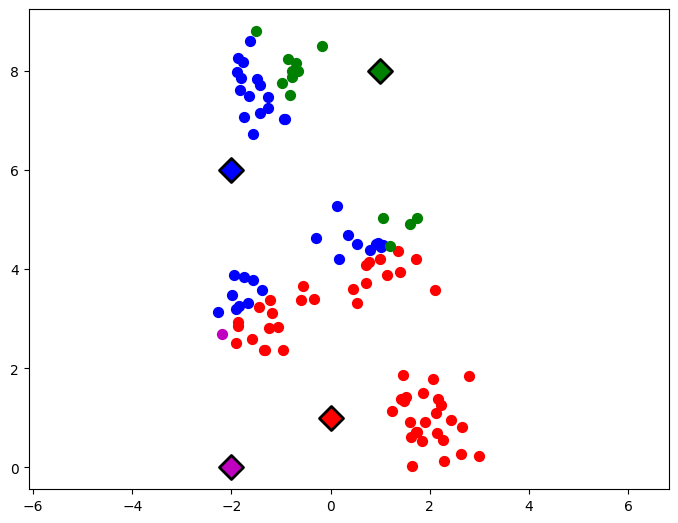

In [5]:
d = np.zeros(4)
y_kmeans = np.zeros(len(X))
x0 = X[:,0]
x1 = X[:,1]

for n in range(0,len(X)):
    d[0]= np.sqrt((c0[0]-x0[n])**2 + (c0[1]-x1[n])**2)
    d[1]= np.sqrt((c1[0]-x0[n])**2 + (c1[1]-x1[n])**2)
    d[2]= np.sqrt((c2[0]-x0[n])**2 + (c2[1]-x1[n])**2)
    d[3]= np.sqrt((c3[0]-x0[n])**2 + (c3[1]-x1[n])**2)
    #print(d)
    y_kmeans[n]=np.argmin(d)
    #print(y_kmeans[n].astype('int'))
y_kmeans = y_kmeans.astype('int')
#print(y_kmeans)

class0 = (y_kmeans==0)
class1 = (y_kmeans==1)
class2 = (y_kmeans==2)
class3 = (y_kmeans==3)

fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
#ax_kmeans.set_xlim([-3,10])
#ax_kmeans.set_ylim([-3,10])
ax_kmeans.axis('equal')
ax_kmeans.scatter(x0[class0],x1[class0] ,c='r',s=50,label='class0')
ax_kmeans.scatter(x0[class1],x1[class1] ,c='b',s=50,label='class1')
ax_kmeans.scatter(x0[class2],x1[class2] ,c='g',s=50,label='class2')
ax_kmeans.scatter(x0[class3],x1[class3] ,c='m',s=50,label='class3')

plt.scatter(c0[0],c0[1], c='r',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c1[0],c1[1], c='b',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c2[0],c2[1], c='g',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c3[0],c3[1], c='m',s=150,marker="D",edgecolor='k',linewidths=2)


### **🟢 Beginner Explanation - Basic K-Means Clustering (Manual Implementation)**

---

#### **🔷 Code Breakdown:**

```python
import numpy as np
import matplotlib.pyplot as plt

# Initialize distance array for 4 clusters
d = np.zeros(4)  # This array will store the distance of each point to 4 cluster centers

# Prepare an array to store the cluster assignments
y_kmeans = np.zeros(len(X))

# Extract the x and y coordinates from the data
x0 = X[:,0]  # x-coordinates
x1 = X[:,1]  # y-coordinates

# Loop through each data point
for n in range(0, len(X)):
    # Calculate the distance from the point to each cluster center
    d[0] = np.sqrt((c0[0] - x0[n])**2 + (c0[1] - x1[n])**2)  # Distance to cluster 0
    d[1] = np.sqrt((c1[0] - x0[n])**2 + (c1[1] - x1[n])**2)  # Distance to cluster 1
    d[2] = np.sqrt((c2[0] - x0[n])**2 + (c2[1] - x1[n])**2)  # Distance to cluster 2
    d[3] = np.sqrt((c3[0] - x0[n])**2 + (c3[1] - x1[n])**2)  # Distance to cluster 3
    
    # Assign the point to the nearest cluster (smallest distance)
    y_kmeans[n] = np.argmin(d)

# Convert the cluster assignments to integers
y_kmeans = y_kmeans.astype('int')
```

---

#### **🔷 What This Part Does:**

1. **Initialize Distance Array:**

   * **`d = np.zeros(4)`** → Creates an empty array to hold the **distances** to the **4** cluster centers.

2. **Prepare Cluster Labels:**

   * **`y_kmeans = np.zeros(len(X))`** → Creates an array to store the **cluster** for each data point.

3. **Extract Coordinates:**

   * **`x0`** and **`x1`** hold the **x** and **y** positions of the data points.

4. **Loop Over Each Data Point:**

   * **Calculates** the **distance** of each point to **every** cluster center.
   * **Assigns** the **cluster** with the **smallest** distance using **`np.argmin(d)`**.

---

#### **🔷 Labeling the Points by Cluster:**

```python
# Separate the points by their cluster
class0 = (y_kmeans == 0)  # All points assigned to cluster 0
class1 = (y_kmeans == 1)  # All points assigned to cluster 1
class2 = (y_kmeans == 2)  # All points assigned to cluster 2
class3 = (y_kmeans == 3)  # All points assigned to cluster 3
```

---

#### **🔷 Plotting the Clusters and Centers:**

```python
# Create a figure for the plot
fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0, 0, 1, 1])

# Set the x and y axes to be equal
ax_kmeans.axis('equal')

# Plot each cluster with a different color
ax_kmeans.scatter(x0[class0], x1[class0], c='r', s=50, label='class0')  # Cluster 0 (red)
ax_kmeans.scatter(x0[class1], x1[class1], c='b', s=50, label='class1')  # Cluster 1 (blue)
ax_kmeans.scatter(x0[class2], x1[class2], c='g', s=50, label='class2')  # Cluster 2 (green)
ax_kmeans.scatter(x0[class3], x1[class3], c='m', s=50, label='class3')  # Cluster 3 (magenta)

# Plot the cluster centers
plt.scatter(c0[0], c0[1], c='r', s=150, marker="D", edgecolor='k', linewidths=2)
plt.scatter(c1[0], c1[1], c='b', s=150, marker="D", edgecolor='k', linewidths=2)
plt.scatter(c2[0], c2[1], c='g', s=150, marker="D", edgecolor='k', linewidths=2)
plt.scatter(c3[0], c3[1], c='m', s=150, marker="D", edgecolor='k', linewidths=2)

plt.show()
```

---

#### **🔷 What This Part Does:**

1. **Create a New Figure for the Plot:**

   * Sets up a **blank canvas** for the plot.

2. **Plot the Data Points by Cluster:**

   * **Colors** each cluster differently.
   * **Sizes** the points for better visibility (**`s=50`**).

3. **Plot the Cluster Centers:**

   * **Marks** the cluster centers with **large** **diamonds** and **black borders**.

---

#### **🔷 Expected Result:**

* A scatter plot with **4** distinct **colored** clusters, each with a **large diamond** representing the **initial cluster center**.

---

Would you like me to show you how to **update** these cluster centers in the **next iteration** to make the clusters more accurate? 😊


Calculates the Euclidean distance between each data point and the 4 centroids.

Assigns each point to the closest centroid based on the minimum distance.

Converts the predicted cluster labels to integers.

Separates data points based on their cluster assignment.

Plots each cluster in a different color.

Recomputes the centroids as the mean of the data points in each cluster.

Updates the centroid positions for the next iteration.



## Compute the new locations for the centroids
location = mean of the datapoints assigned to the cluster


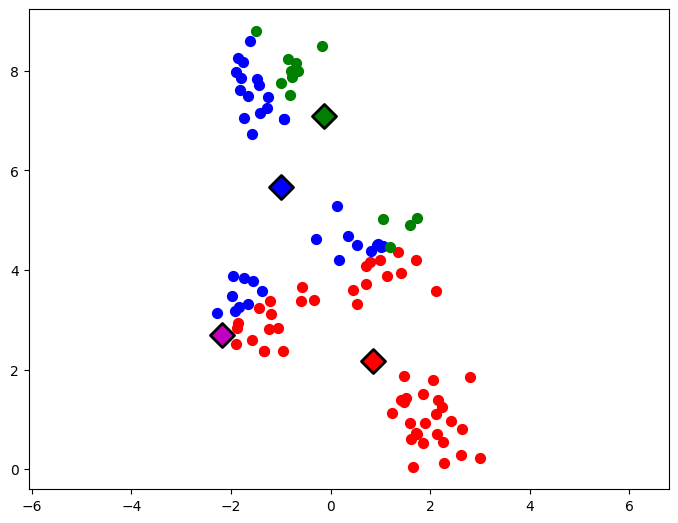

In [6]:
# new location
c0 = [np.mean(x0[class0]),np.mean(x1[class0])]
c1 = [np.mean(x0[class1]),np.mean(x1[class1])]
c2 = [np.mean(x0[class2]),np.mean(x1[class2])]
c3 = [np.mean(x0[class3]),np.mean(x1[class3])]

class0 = (y_kmeans==0)
class1 = (y_kmeans==1)
class2 = (y_kmeans==2)
class3 = (y_kmeans==3)

fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')
x0 = X[:, 0]
x1 = X[:, 1]
ax_kmeans.scatter(x0[class0],x1[class0] ,c='r',s=50,label='class0')
ax_kmeans.scatter(x0[class1],x1[class1] ,c='b',s=50,label='class1')
ax_kmeans.scatter(x0[class2],x1[class2] ,c='g',s=50,label='class2')
ax_kmeans.scatter(x0[class3],x1[class3] ,c='m',s=50,label='class3')

plt.scatter(c0[0],c0[1], c='r',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c1[0],c1[1], c='b',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c2[0],c2[1], c='g',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c3[0],c3[1], c='m',s=150,marker="D",edgecolor='k',linewidths=2)


### **🟢 Beginner Explanation - Updating Cluster Centers in K-Means**

---

#### **🔷 Code Breakdown:**

```python
# Update the cluster centers to the mean position of the current clusters
c0 = [np.mean(x0[class0]), np.mean(x1[class0])]
c1 = [np.mean(x0[class1]), np.mean(x1[class1])]
c2 = [np.mean(x0[class2]), np.mean(x1[class2])]
c3 = [np.mean(x0[class3]), np.mean(x1[class3])]
```

**What this does:**

1. **Find the New Centers for Each Cluster:**

   * **`np.mean()`** calculates the **average** (mean) **x** and **y** positions for each cluster.
   * **`class0`** to **`class3`** are **boolean** arrays indicating which points belong to which cluster.
   * The new cluster center is the **average** position of all points in that cluster.

---

```python
# Re-assign the points to the new clusters
class0 = (y_kmeans == 0)
class1 = (y_kmeans == 1)
class2 = (y_kmeans == 2)
class3 = (y_kmeans == 3)
```

**What this does:**

* **Updates** the cluster assignments based on the **new** cluster centers.
* **Recalculates** which points belong to each cluster based on the **latest** cluster centers.

---

```python
# Plot the updated clusters and their new centers
fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0, 0, 1, 1])
ax_kmeans.axis('equal')

# Extract x and y positions
x0 = X[:, 0]
x1 = X[:, 1]

# Plot the points for each cluster
ax_kmeans.scatter(x0[class0], x1[class0], c='r', s=50, label='class0')  # Cluster 0 (Red)
ax_kmeans.scatter(x0[class1], x1[class1], c='b', s=50, label='class1')  # Cluster 1 (Blue)
ax_kmeans.scatter(x0[class2], x1[class2], c='g', s=50, label='class2')  # Cluster 2 (Green)
ax_kmeans.scatter(x0[class3], x1[class3], c='m', s=50, label='class3')  # Cluster 3 (Magenta)

# Plot the new cluster centers
plt.scatter(c0[0], c0[1], c='r', s=150, marker="D", edgecolor='k', linewidths=2)  # New center for Cluster 0
plt.scatter(c1[0], c1[1], c='b', s=150, marker="D", edgecolor='k', linewidths=2)  # New center for Cluster 1
plt.scatter(c2[0], c2[1], c='g', s=150, marker="D", edgecolor='k', linewidths=2)  # New center for Cluster 2
plt.scatter(c3[0], c3[1], c='m', s=150, marker="D", edgecolor='k', linewidths=2)  # New center for Cluster 3

plt.show()
```

**What this does:**

1. **Creates a New Figure:**

   * Sets up a **new** canvas for the updated clusters.

2. **Plots the Updated Clusters:**

   * **Colors** each cluster differently for **easy** identification.
   * **Sizes** each point for better visibility (**`s=50`**).

3. **Plots the New Cluster Centers:**

   * Marks the **new** cluster centers with **large diamonds** and **black borders** to make them stand out.

---

#### **🔷 Expected Result:**

* The **cluster centers** should **move** closer to the **middle** of each group of points.
* The **clusters** should **tighten** around their **centers** as the algorithm **refines** the groupings.

---

#### **🔷 Why This is Important:**

* This is part of the **K-Means** **"update"** step, where the **centers** of each cluster are **recalculated** to better represent the data points.
* This process **repeats** until the cluster centers **stop moving**, meaning the **clusters** are **stable**.

---

Would you like me to show you how to **automate** this process with a **loop** to reach the **final** stable clusters? 😊


8. Final Cluster Assignment (Repeat)
The code then repeats the assignment and centroid updating steps, which effectively completes one iteration of the K-means algorithm.

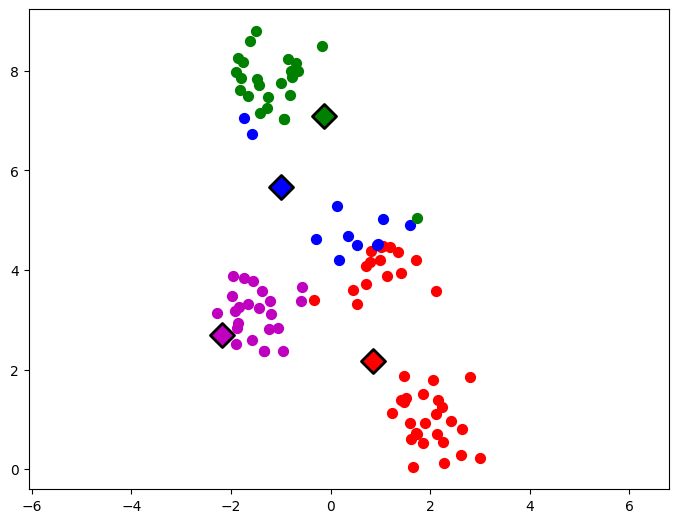

In [7]:
# Euclidische distance

for n in range(0,len(X)):
    d[0]= np.sqrt((c0[0]-x0[n])**2 + (c0[1]-x1[n])**2)
    d[1]= np.sqrt((c1[0]-x0[n])**2 + (c1[1]-x1[n])**2)
    d[2]= np.sqrt((c2[0]-x0[n])**2 + (c2[1]-x1[n])**2)
    d[3]= np.sqrt((c3[0]-x0[n])**2 + (c3[1]-x1[n])**2)
    y_kmeans[n]=np.argmin(d)

y_kmeans = y_kmeans.astype('int')


class0 = (y_kmeans==0)
class1 = (y_kmeans==1)
class2 = (y_kmeans==2)
class3 = (y_kmeans==3)

fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')
x0 = X[:, 0]
x1 = X[:, 1]
ax_kmeans.scatter(x0[class0],x1[class0] ,c='r',s=50,label='class0')
ax_kmeans.scatter(x0[class1],x1[class1] ,c='b',s=50,label='class1')
ax_kmeans.scatter(x0[class2],x1[class2] ,c='g',s=50,label='class2')
ax_kmeans.scatter(x0[class3],x1[class3] ,c='m',s=50,label='class3')

plt.scatter(c0[0],c0[1], c='r',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c1[0],c1[1], c='b',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c2[0],c2[1], c='g',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c3[0],c3[1], c='m',s=150,marker="D",edgecolor='k',linewidths=2)


### **🟢 Beginner Explanation - Assigning Points to Clusters with Euclidean Distance**

---

#### **🔷 Code Breakdown:**

```python
# Loop through each data point to assign it to the nearest cluster
for n in range(0, len(X)):
    # Calculate the distance from each point to the 4 cluster centers
    d[0] = np.sqrt((c0[0] - x0[n])**2 + (c0[1] - x1[n])**2)  # Distance to cluster center 0
    d[1] = np.sqrt((c1[0] - x0[n])**2 + (c1[1] - x1[n])**2)  # Distance to cluster center 1
    d[2] = np.sqrt((c2[0] - x0[n])**2 + (c2[1] - x1[n])**2)  # Distance to cluster center 2
    d[3] = np.sqrt((c3[0] - x0[n])**2 + (c3[1] - x1[n])**2)  # Distance to cluster center 3
    
    # Find the cluster center with the smallest distance and assign the point to that cluster
    y_kmeans[n] = np.argmin(d)

# Convert the cluster assignments to integers
y_kmeans = y_kmeans.astype('int')
```

**What this does:**

1. **Calculates Distance for Each Point:**

   * Loops through **each** data point.
   * **Calculates** the **Euclidean distance** from the point to **each** of the 4 cluster centers (**c0, c1, c2, c3**).
   * Euclidean distance formula:

   $$
   \text{Distance} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
   $$

   * This measures **how far** each point is from each cluster center.

2. **Assigns Points to the Nearest Cluster:**

   * **`np.argmin(d)`** finds the **index** of the **smallest** distance, meaning the **closest** cluster center.
   * **`y_kmeans[n]`** saves this **cluster number** for each point.

---

```python
# Group the points into clusters
class0 = (y_kmeans == 0)  # All points in cluster 0
class1 = (y_kmeans == 1)  # All points in cluster 1
class2 = (y_kmeans == 2)  # All points in cluster 2
class3 = (y_kmeans == 3)  # All points in cluster 3
```

**What this does:**

* **Creates** **boolean masks** for each cluster.
* This is like creating **tags** to **identify** which points belong to each cluster.

---

```python
# Plot the clustered data
fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')

# Extract x and y positions
x0 = X[:, 0]
x1 = X[:, 1]

# Plot each cluster with a different color
ax_kmeans.scatter(x0[class0], x1[class0], c='r', s=50, label='class0')  # Red points for cluster 0
ax_kmeans.scatter(x0[class1], x1[class1], c='b', s=50, label='class1')  # Blue points for cluster 1
ax_kmeans.scatter(x0[class2], x1[class2], c='g', s=50, label='class2')  # Green points for cluster 2
ax_kmeans.scatter(x0[class3], x1[class3], c='m', s=50, label='class3')  # Magenta points for cluster 3

# Plot the cluster centers as larger, diamond-shaped points
plt.scatter(c0[0], c0[1], c='r', s=150, marker="D", edgecolor='k', linewidths=2)  # Center for cluster 0
plt.scatter(c1[0], c1[1], c='b', s=150, marker="D", edgecolor='k', linewidths=2)  # Center for cluster 1
plt.scatter(c2[0], c2[1], c='g', s=150, marker="D", edgecolor='k', linewidths=2)  # Center for cluster 2
plt.scatter(c3[0], c3[1], c='m', s=150, marker="D", edgecolor='k', linewidths=2)  # Center for cluster 3

plt.show()
```

**What this does:**

1. **Creates a New Plot:**

   * Sets up a new **canvas** for the **cluster** visualization.

2. **Plots the Data Points in Different Colors:**

   * Each cluster gets a **different** color for **easy** visualization.

3. **Marks the Cluster Centers:**

   * **Centers** are shown as **large** diamonds with **black borders** for **clear visibility**.

---

#### **🔷 Expected Result:**

* You should see **4** distinct clusters, each with a different **color**, and their **centers** marked with **large diamonds**.

---

#### **🔷 Why This is Important:**

* This is the **core** part of the **K-Means** clustering algorithm, where each data point is **assigned** to its **nearest** cluster center.
* This step **repeats** as the **centers** are **updated** until the clusters become **stable**.

---

Would you like me to show you how to **automate** this process so it keeps going until the **centers** **stop moving**? 😊


In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans.labels_

array([3, 1, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 4, 2, 0, 0, 4, 3, 1,
       0, 4, 3, 0, 0, 3, 2, 4, 4, 1, 4, 2, 0, 3, 1, 2, 1, 0, 3, 0, 1, 0,
       0, 1, 4, 0, 3, 3, 3, 4, 0, 0, 0, 1, 1, 4, 2, 1, 1, 2, 2, 3, 2, 1,
       0, 0, 2, 3, 1, 2, 3, 1, 3, 3, 0, 0, 4, 2, 4, 1, 0, 3, 4, 0, 2, 4,
       3, 3, 3, 0, 3, 0, 0, 1, 1, 0, 1, 3], dtype=int32)

### **🟢 Beginner Explanation - K-Means Clustering in Scikit-Learn**

---

#### **🔷 Code Breakdown:**

```python
from sklearn.cluster import KMeans

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Get the cluster labels for each point
kmeans.labels_
```

---

**What this code does:**

1. **Import the K-Means Algorithm:**

   ```python
   from sklearn.cluster import KMeans
   ```

   * This **imports** the **KMeans** class from the **scikit-learn** library, which is a **powerful** machine learning library in Python.

---

2. **Create a K-Means Model:**

   ```python
   kmeans = KMeans(n_clusters=5, random_state=0)
   ```

   * **`n_clusters=5`** - You are telling the model to create **5** clusters.
   * **`random_state=0`** - This ensures the results are **reproducible** by **fixing** the random numbers used.

---

3. **Train (or "Fit") the Model on Your Data:**

   ```python
   kmeans.fit(X)
   ```

   * This is where the **actual clustering** happens.
   * The model tries to **group** the **data points** in **X** into **5** different clusters.
   * It **repeats** this process, **moving** the cluster centers until they **stop changing** (or reach a maximum number of **iterations**).

---

4. **Get the Cluster Labels:**

   ```python
   kmeans.labels_
   ```

   * **Outputs** an **array** of **cluster labels**.
   * **Each** number in this array **represents** which **cluster** each data point **belongs** to.
   * For example, if the first number is **2**, it means the **first** data point is in **cluster 2**.

---

#### **🔷 Why This is Important:**

* **Labels** are the **main output** of **K-Means**.
* They **tell you** which **group** each data point **belongs** to, allowing you to **analyze** the **structure** of your data.

---

#### **🔷 Example Output:**

If you have 10 data points, the output might look like this:

```python
array([0, 2, 1, 4, 3, 2, 0, 4, 1, 3])
```

This means:

* **Point 1** is in **Cluster 0**
* **Point 2** is in **Cluster 2**
* **Point 3** is in **Cluster 1**
* **Point 4** is in **Cluster 4**
* **Point 5** is in **Cluster 3**
* **...**

---

Would you like me to show you how to **visualize** these clusters to make it easier to **understand** the results? 😊


Text(0.5, 1.0, 'Unequal Variance')

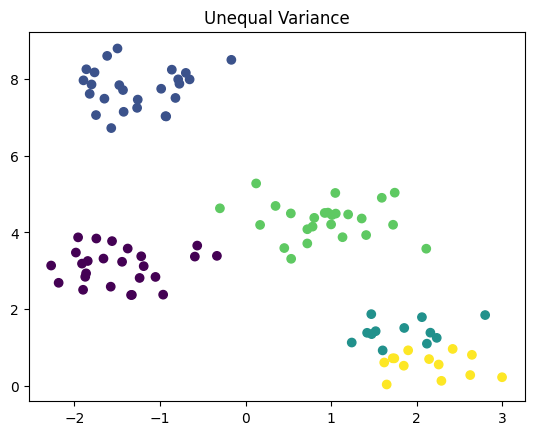

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("Unequal Variance")

In [10]:
print('Inertia: ',kmeans.inertia_)

Inertia:  43.39904506050977


### **🟢 Beginner Explanation - Visualizing K-Means Clusters with Inertia**

---

#### **🔷 Code Breakdown:**

```python
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("Unequal Variance")
print('Inertia: ', kmeans.inertia_)
```

---

**What this code does:**

1. **Scatter Plot of Clustered Data:**

   ```python
   plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
   ```

   * **`X[:, 0]`** - This selects **all rows** from the **first** column (X-axis).
   * **`X[:, 1]`** - This selects **all rows** from the **second** column (Y-axis).
   * **`c=kmeans.labels_`** - The **color** of each point is determined by the **cluster label** from the **K-Means** model, so each cluster gets a different **color**.

---

2. **Add a Title:**

   ```python
   plt.title("Unequal Variance")
   ```

   * Adds a **title** to the **plot**, which helps you understand what you are looking at.

---

3. **Print the Inertia:**

   ```python
   print('Inertia: ', kmeans.inertia_)
   ```

   * **Inertia** is a measure of how **tight** the clusters are.
   * It **calculates** the **sum** of the **distances** between each **data point** and its **closest cluster center**.
   * **Lower** inertia means **tighter** clusters and **better** grouping.
   * **Higher** inertia means the points are **more spread out** within their clusters.

---

#### **🔷 Why This is Important:**

* **Visualization** helps you **see** the **clusters** your model found.
* **Inertia** is a **quick** way to **check** how **well** the model **grouped** the data.

---

#### **🔷 Example Output:**

If you run this code, you'll see a **scatter plot** like this:

* Different **colors** for each cluster.
* The **title** "Unequal Variance" at the top.
* An **inertia** value printed in your console, like:

```
Inertia: 340.25
```

---

Would you like me to show you how to **improve** this visualization by adding **cluster centers** and **better coloring**? 😊


Fits a full K-means model using sklearn.

Prints the inertia, which measures the compactness of the clusters (lower is better).



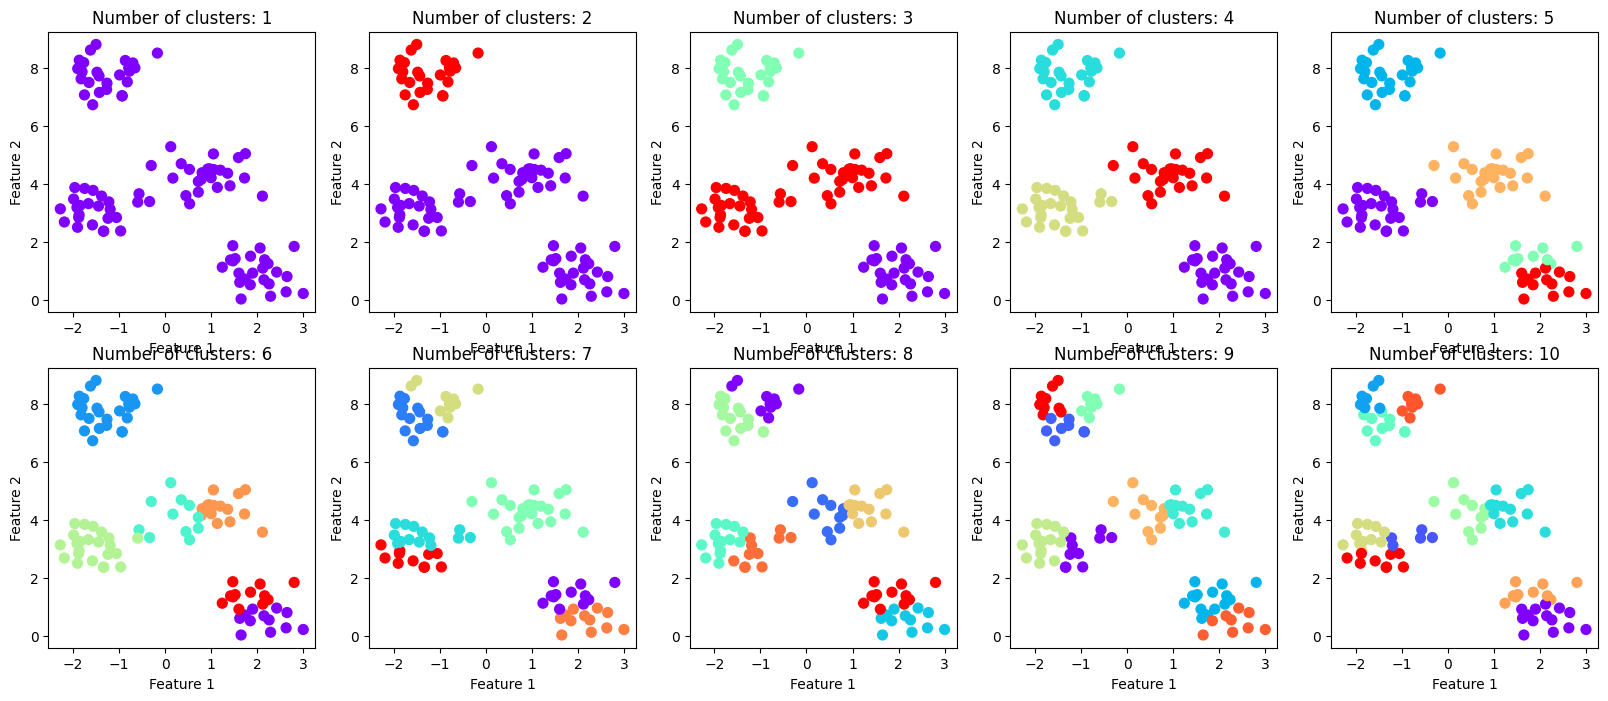

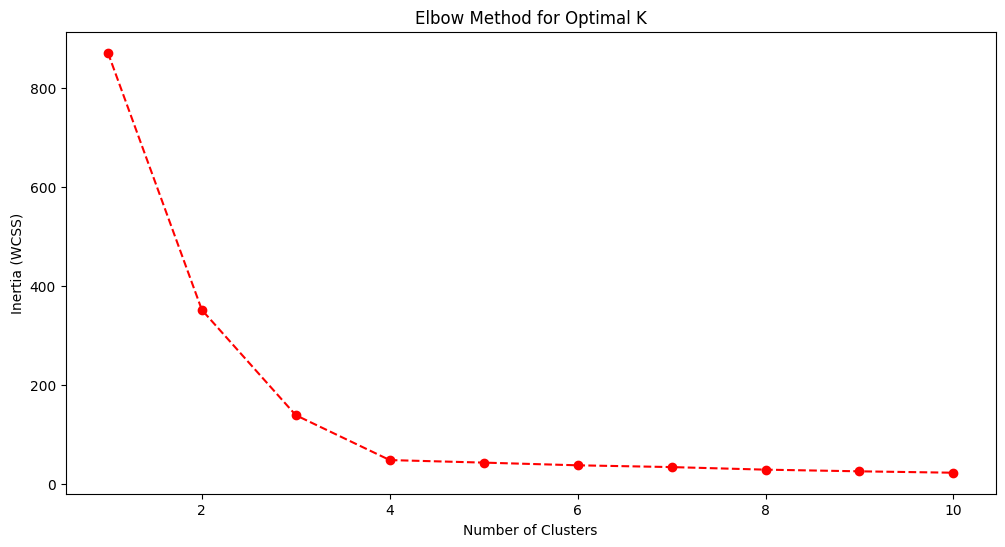

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate the blobs
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.50, random_state=0)

# Inertia plot
inertia = []
plt.figure(figsize=(20, 8))

for c in range(1, 11):
    # Train the KMeans model
    model = KMeans(n_clusters=c, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='lloyd')
    model.fit(X)
    y_kmeans = model.predict(X)

    # Append inertia (within-cluster sum of squares)
    inertia.append(model.inertia_)

    # Plot the clusters
    plt.subplot(2, 5, c)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')
    plt.title(f'Number of clusters: {c}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot inertia (elbow method)
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o--', color='red')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.show()


### **🟢 Beginner Explanation - Finding the Optimal Number of Clusters (Elbow Method)**

---

#### **🔷 Code Breakdown:**

This code **trains** and **visualizes** **K-Means** clustering for different numbers of clusters and then **plots** the **elbow curve** to help you choose the **optimal** number of clusters.

---

1. **Import Required Libraries:**

```python
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
```

* **`matplotlib.pyplot`** - For **visualizing** the clusters and elbow curve.
* **`numpy`** - For numerical operations.
* **`sklearn.cluster.KMeans`** - For creating the **K-Means** clustering model.
* **`sklearn.datasets.make_blobs`** - For generating **synthetic** data with **clusters**.

---

2. **Generate Synthetic Data (Blobs):**

```python
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.50, random_state=0)
```

* **`n_samples=100`** - Create **100** data points.
* **`centers=4`** - Create **4** distinct clusters.
* **`cluster_std=0.50`** - Controls the **spread** of the clusters.
* **`random_state=0`** - Ensures you get the **same** blobs every time.

---

3. **Set Up for Plotting:**

```python
inertia = []
plt.figure(figsize=(20, 8))
```

* **`inertia = []`** - Create an **empty** list to **store** the **inertia** values (WCSS).
* **`plt.figure(figsize=(20, 8))`** - Make the figure **wider** for **clear** subplots.

---

4. **Train K-Means for Different Cluster Numbers (1 to 10):**

```python
for c in range(1, 11):
    # Train the KMeans model
    model = KMeans(n_clusters=c, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='lloyd')
    model.fit(X)
    y_kmeans = model.predict(X)

    # Append inertia (within-cluster sum of squares)
    inertia.append(model.inertia_)

    # Plot the clusters
    plt.subplot(2, 5, c)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')
    plt.title(f'Number of clusters: {c}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
```

* **`n_clusters=c`** - Use **c** clusters, changing from **1** to **10**.
* **`init='k-means++'`** - **Smart** way to choose initial **centers** for faster **convergence**.
* **`n_init=10`** - Run the **algorithm** **10** times with different **centers**.
* **`max_iter=300`** - Maximum **300** iterations per run.
* **`tol=0.0001`** - Tolerance for **convergence**.
* **`random_state=111`** - Ensures reproducibility.
* **`algorithm='lloyd'`** - The classic **K-Means** algorithm.

---

* **Calculate Inertia:**

  ```python
  inertia.append(model.inertia_)
  ```

  * Adds the **inertia** (within-cluster sum of squares, **WCSS**) for each **model** to the **list**.

* **Plot the Clusters:**

  ```python
  plt.subplot(2, 5, c)
  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')
  plt.title(f'Number of clusters: {c}')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  ```

  * Creates **10** subplots, each showing the data clustered with a **different** number of clusters.

---

5. **Plot the Elbow Curve:**

```python
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o--', color='red')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.show()
```

* **`plt.figure(figsize=(12, 6))`** - Create a **new** figure for the elbow plot.
* **`plt.plot(np.arange(1, 11), inertia, 'o--', color='red')`** - Plots the **inertia** values for **each** cluster count.
* **`plt.title("Elbow Method for Optimal K")`** - Add a title.
* **`plt.xlabel("Number of Clusters")`** - Label the **X-axis**.
* **`plt.ylabel("Inertia (WCSS)")`** - Label the **Y-axis**.

---

#### **🔷 What to Expect:**

* **First Plot:** Shows **10** different cluster setups.
* **Second Plot:** Shows the **Elbow Curve** - the point where the **inertia** starts to **flatten** is usually the **best** choice for **K**.

---

Would you like me to show you how to **automatically** pick the **optimal K** without having to **look** at the **elbow plot**? 😊


Generates a subplot for each k from 1 to 10.

Plots the inertia (within-cluster sum of squares) to identify the optimal k using the Elbow Method.

